In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
# import missingno as msno 
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("D:/flight_weather_data_V9_3/flight_weather_data_V9_3.csv")
df["ARR_DELAY"].max()

C:\Users\lou3208\AppData\Local\Temp\ipykernel_21972\1296081903.py:1: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/flight_weather_data_V9_3/flight_weather_data_V9_3.csv")


3795.0

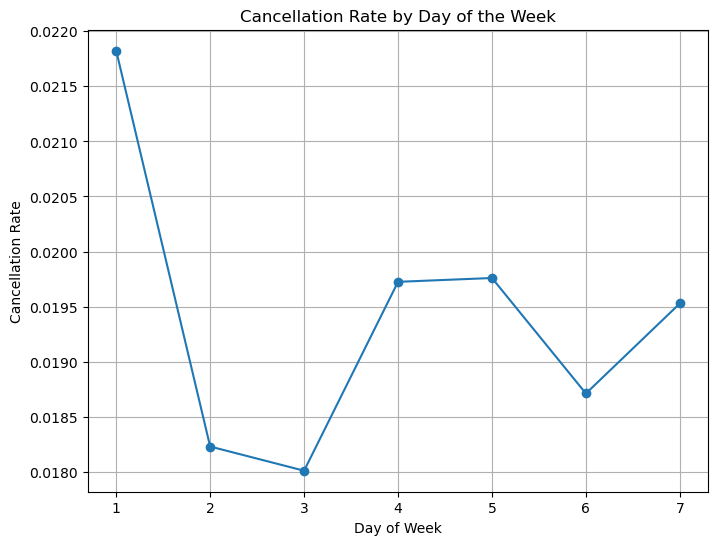

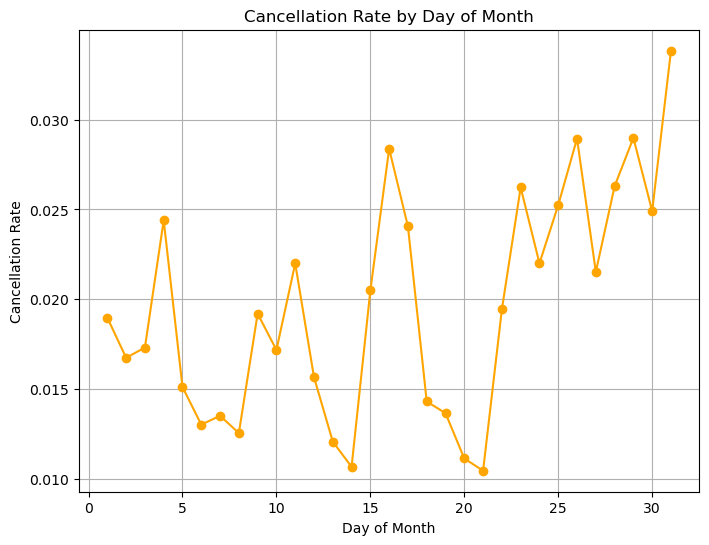

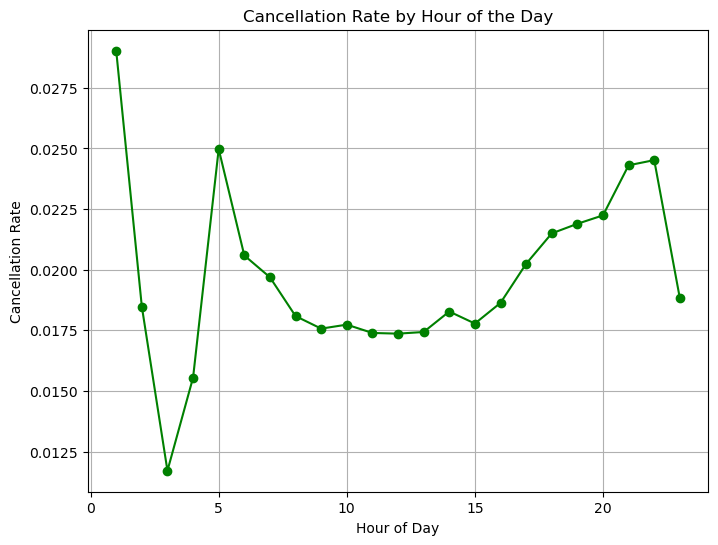

In [3]:
df['CANCELLED'] = df['CANCELLED'].astype(int)

# Convert `CRS_DEP_TIME` to datetime and extract hour
df['CRS_DEP_HOUR'] = pd.to_datetime(df['CRS_DEP_TIME'], format='%H%M', errors='coerce').dt.hour

### Daily Pattern Analysis ###
# Group by `DAY_OF_WEEK` and calculate cancellation rate
daily_cancellations = df.groupby('DAY_OF_WEEK')['CANCELLED'].mean().reset_index()
daily_cancellations.columns = ['Day of Week', 'Cancellation Rate']

### Monthly Pattern Analysis ###
# Group by `MONTH` and calculate cancellation rate
monthly_cancellations = df.groupby('DAY_OF_MONTH')['CANCELLED'].mean().reset_index()
monthly_cancellations.columns = ['Day of Month', 'Cancellation Rate']

### Hourly Pattern Analysis ###
# Group by `CRS_DEP_HOUR` and calculate cancellation rate
hourly_cancellations = df.groupby('CRS_DEP_HOUR')['CANCELLED'].mean().reset_index()
hourly_cancellations.columns = ['Hour of Day', 'Cancellation Rate']

### Visualization (optional) ###
import matplotlib.pyplot as plt

# Daily Pattern Plot
plt.figure(figsize=(8, 6))
plt.plot(daily_cancellations['Day of Week'], daily_cancellations['Cancellation Rate'], marker='o')
plt.xlabel('Day of Week')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Day of the Week')
plt.grid()
plt.show()

# Monthly Pattern Plot
plt.figure(figsize=(8, 6))
plt.plot(monthly_cancellations['Day of Month'], monthly_cancellations['Cancellation Rate'], marker='o', color='orange')
plt.xlabel('Day of Month')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Day of Month')
plt.grid()
plt.show()

# Hourly Pattern Plot
plt.figure(figsize=(8, 6))
plt.plot(hourly_cancellations['Hour of Day'], hourly_cancellations['Cancellation Rate'], marker='o', color='green')
plt.xlabel('Hour of Day')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Hour of the Day')
plt.grid()
plt.show()

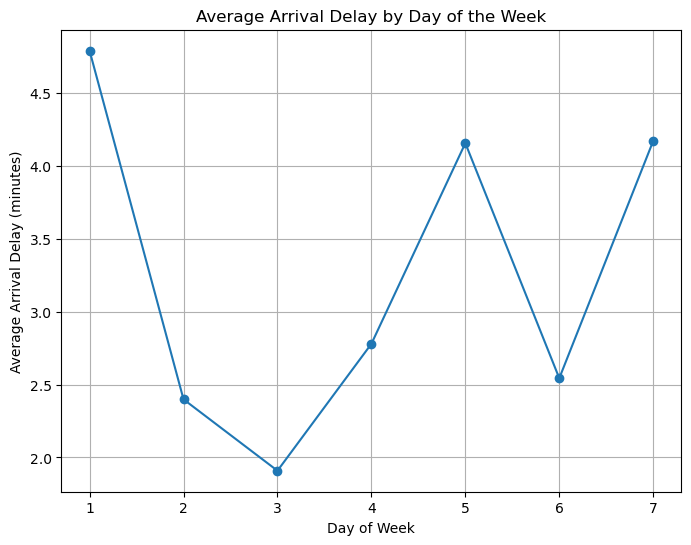

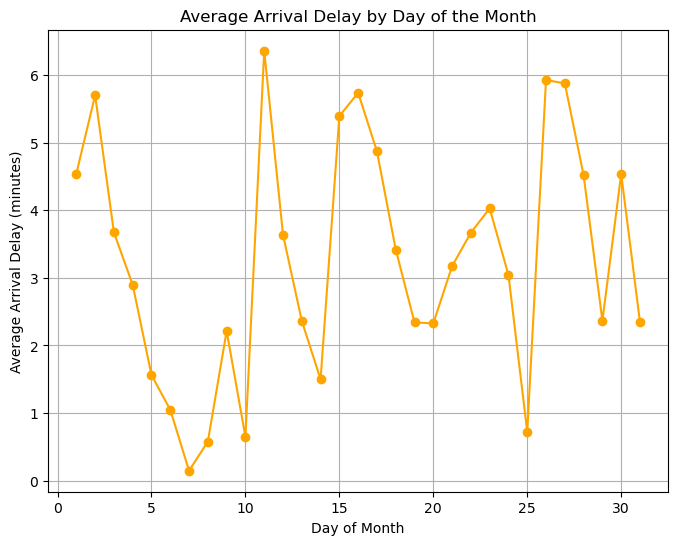

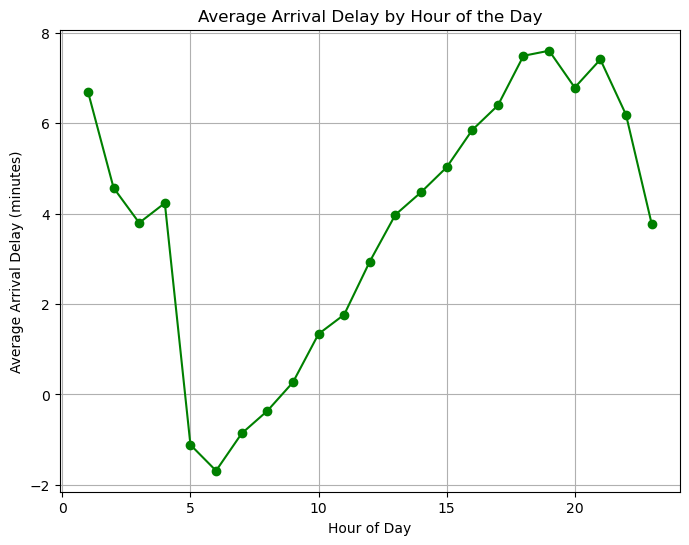

In [4]:
### Daily Pattern Analysis for ARR_DELAY ###
# Group by `DAY_OF_WEEK` and calculate the mean arrival delay
daily_arr_delay = df.groupby('DAY_OF_WEEK')['ARR_DELAY'].mean().reset_index()
daily_arr_delay.columns = ['Day of Week', 'Average Arrival Delay']

### Monthly Pattern Analysis for ARR_DELAY ###
# Group by `DAY_OF_MONTH` and calculate the mean arrival delay
monthly_arr_delay = df.groupby('DAY_OF_MONTH')['ARR_DELAY'].mean().reset_index()
monthly_arr_delay.columns = ['Day of Month', 'Average Arrival Delay']

### Hourly Pattern Analysis for ARR_DELAY ###
# Group by `CRS_DEP_HOUR` and calculate the mean arrival delay
hourly_arr_delay = df.groupby('CRS_DEP_HOUR')['ARR_DELAY'].mean().reset_index()
hourly_arr_delay.columns = ['Hour of Day', 'Average Arrival Delay']

### Visualization ###
import matplotlib.pyplot as plt

# Daily Pattern Plot for ARR_DELAY
plt.figure(figsize=(8, 6))
plt.plot(daily_arr_delay['Day of Week'], daily_arr_delay['Average Arrival Delay'], marker='o')
plt.xlabel('Day of Week')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Day of the Week')
plt.grid()
plt.show()

# Monthly Pattern Plot for ARR_DELAY
plt.figure(figsize=(8, 6))
plt.plot(monthly_arr_delay['Day of Month'], monthly_arr_delay['Average Arrival Delay'], marker='o', color='orange')
plt.xlabel('Day of Month')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Day of the Month')
plt.grid()
plt.show()

# Hourly Pattern Plot for ARR_DELAY
plt.figure(figsize=(8, 6))
plt.plot(hourly_arr_delay['Hour of Day'], hourly_arr_delay['Average Arrival Delay'], marker='o', color='green')
plt.xlabel('Hour of Day')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Hour of the Day')
plt.grid()
plt.show()


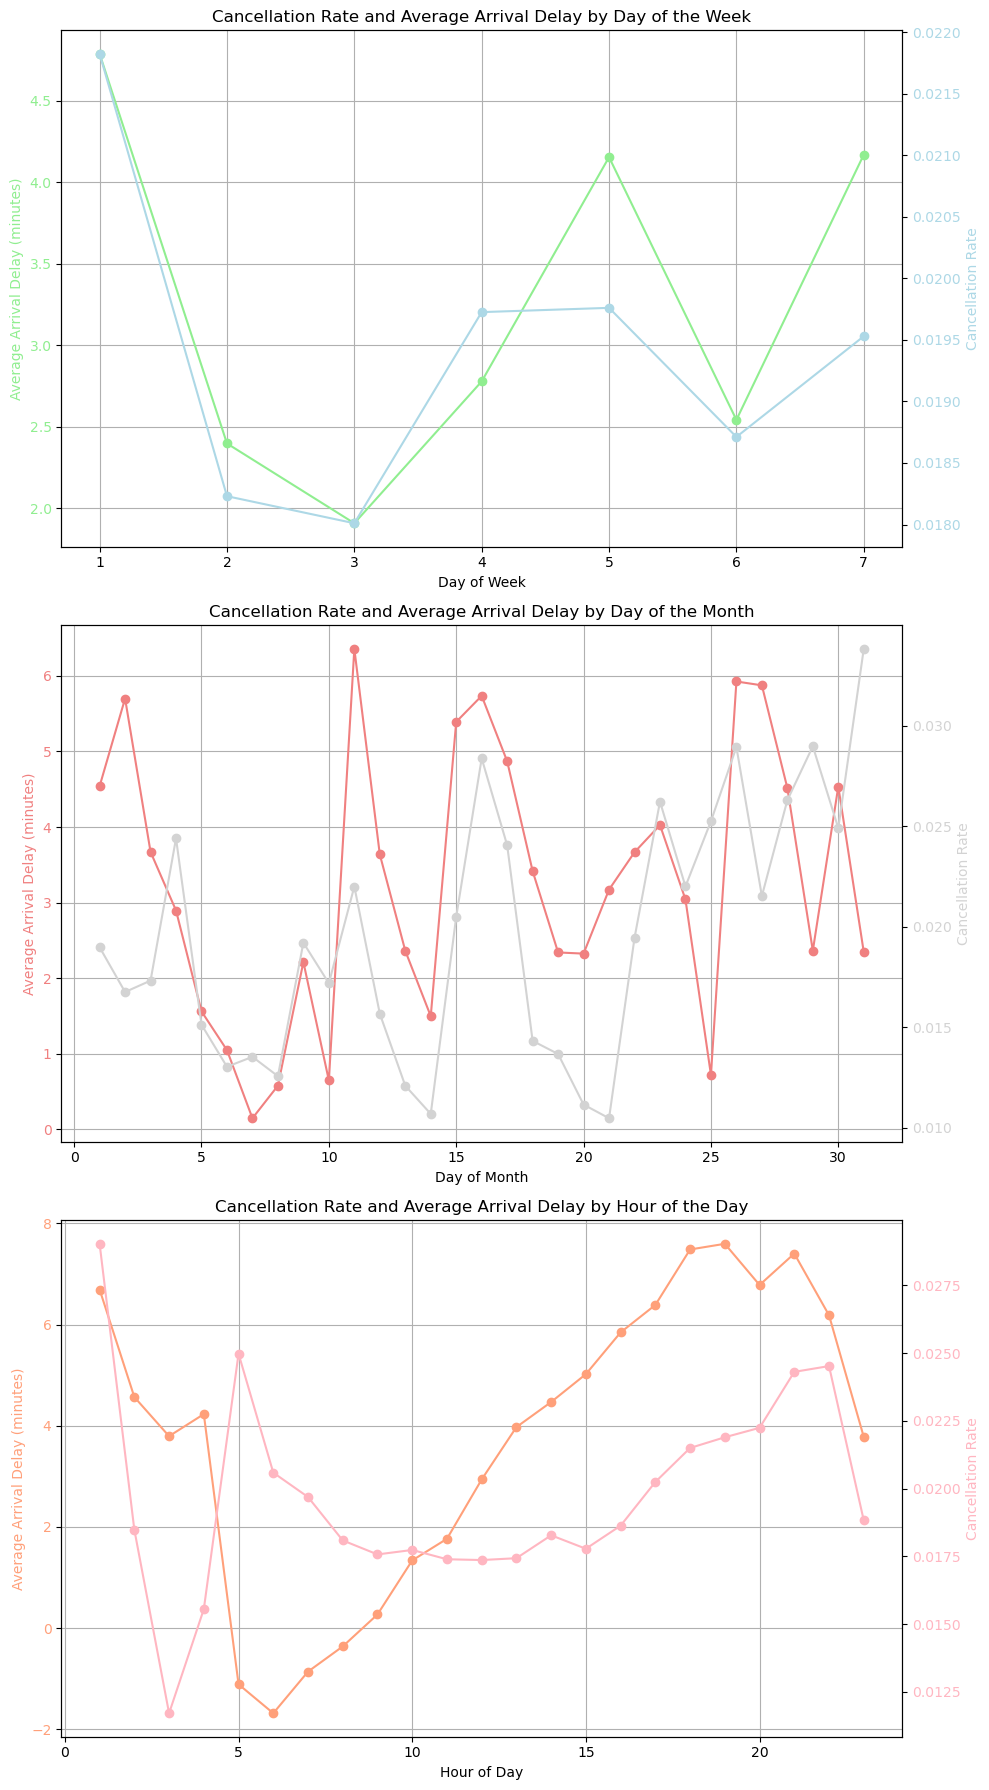

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18), sharex=False)

### Daily Pattern Comparison ###
# Average Arrival Delay (left y-axis) - Light Green
axes[0].plot(daily_arr_delay['Day of Week'], daily_arr_delay['Average Arrival Delay'], marker='o', color='lightgreen', label='Average Arrival Delay (minutes)')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Average Arrival Delay (minutes)', color='lightgreen')
axes[0].tick_params(axis='y', labelcolor='lightgreen')
axes[0].set_title('Cancellation Rate and Average Arrival Delay by Day of the Week')
axes[0].grid()

# Cancellation Rate (right y-axis) - Light Blue
ax2 = axes[0].twinx()
ax2.plot(daily_cancellations['Day of Week'], daily_cancellations['Cancellation Rate'], marker='o', color='lightblue', label='Cancellation Rate')
ax2.set_ylabel('Cancellation Rate', color='lightblue')
ax2.tick_params(axis='y', labelcolor='lightblue')

### Monthly Pattern Comparison ###
# Average Arrival Delay (left y-axis) - Light Red
axes[1].plot(monthly_arr_delay['Day of Month'], monthly_arr_delay['Average Arrival Delay'], marker='o', color='lightcoral', label='Average Arrival Delay (minutes)')
axes[1].set_xlabel('Day of Month')
axes[1].set_ylabel('Average Arrival Delay (minutes)', color='lightcoral')
axes[1].tick_params(axis='y', labelcolor='lightcoral')
axes[1].set_title('Cancellation Rate and Average Arrival Delay by Day of the Month')
axes[1].grid()

# Cancellation Rate (right y-axis) - Light Gray
ax2 = axes[1].twinx()
ax2.plot(monthly_cancellations['Day of Month'], monthly_cancellations['Cancellation Rate'], marker='o', color='lightgray', label='Cancellation Rate')
ax2.set_ylabel('Cancellation Rate', color='lightgray')
ax2.tick_params(axis='y', labelcolor='lightgray')

### Hourly Pattern Comparison ###
# Average Arrival Delay (left y-axis) - Light Orange
axes[2].plot(hourly_arr_delay['Hour of Day'], hourly_arr_delay['Average Arrival Delay'], marker='o', color='lightsalmon', label='Average Arrival Delay (minutes)')
axes[2].set_xlabel('Hour of Day')
axes[2].set_ylabel('Average Arrival Delay (minutes)', color='lightsalmon')
axes[2].tick_params(axis='y', labelcolor='lightsalmon')
axes[2].set_title('Cancellation Rate and Average Arrival Delay by Hour of the Day')
axes[2].grid()

# Cancellation Rate (right y-axis) - Light Pink
ax2 = axes[2].twinx()
ax2.plot(hourly_cancellations['Hour of Day'], hourly_cancellations['Cancellation Rate'], marker='o', color='lightpink', label='Cancellation Rate')
ax2.set_ylabel('Cancellation Rate', color='lightpink')
ax2.tick_params(axis='y', labelcolor='lightpink')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

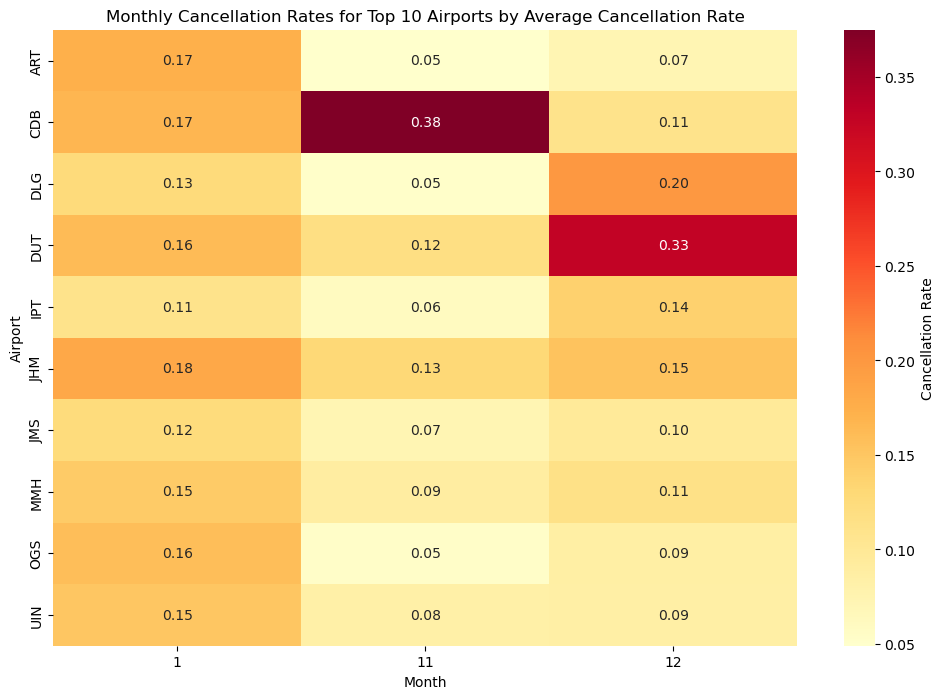

In [6]:
airport_monthly_cancellation = df.groupby(['ORIGIN', 'MONTH'])['CANCELLED'].mean().reset_index()
airport_monthly_cancellation.columns = ['Airport', 'Month', 'Cancellation Rate']

# 2. 计算每个机场的平均取消率，找到排名前十的机场
top_airports = airport_monthly_cancellation.groupby('Airport')['Cancellation Rate'].mean().nlargest(10).index

# 3. 筛选出前十机场的数据
top_airport_data = airport_monthly_cancellation[airport_monthly_cancellation['Airport'].isin(top_airports)]

# 4. 将数据转为透视表格式，方便绘制热力图
pivot_table_top = top_airport_data.pivot(index="Airport", columns="Month", values="Cancellation Rate")

# 5. 可视化 - 使用热力图展示取消率排名前十的机场在不同月份的取消率
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_top, annot=True, cmap="YlOrRd", fmt=".2f", cbar_kws={'label': 'Cancellation Rate'})
plt.title("Monthly Cancellation Rates for Top 10 Airports by Average Cancellation Rate")
plt.xlabel("Month")
plt.ylabel("Airport")
plt.show()

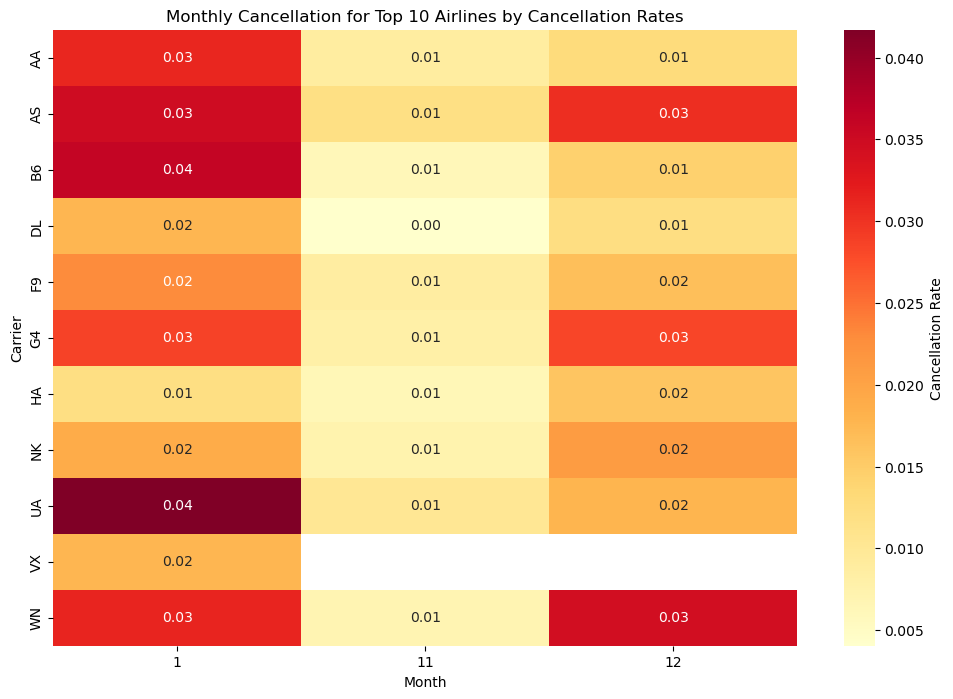

In [7]:
carrier_monthly_cancellation = df.groupby(['MKT_CARRIER', 'MONTH'])['CANCELLED'].mean().reset_index()
carrier_monthly_cancellation.columns = ['Carrier', 'Month', 'Cancellation Rate']

# Convert data to pivot table format for heatmap
pivot_table_carrier = carrier_monthly_cancellation.pivot(index="Carrier", columns="Month", values="Cancellation Rate")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_carrier, annot=True, cmap="YlOrRd", fmt=".2f", cbar_kws={'label': 'Cancellation Rate'})
plt.title("Monthly Cancellation for Top 10 Airlines by Cancellation Rates")
plt.xlabel("Month")
plt.ylabel("Carrier")
plt.show()


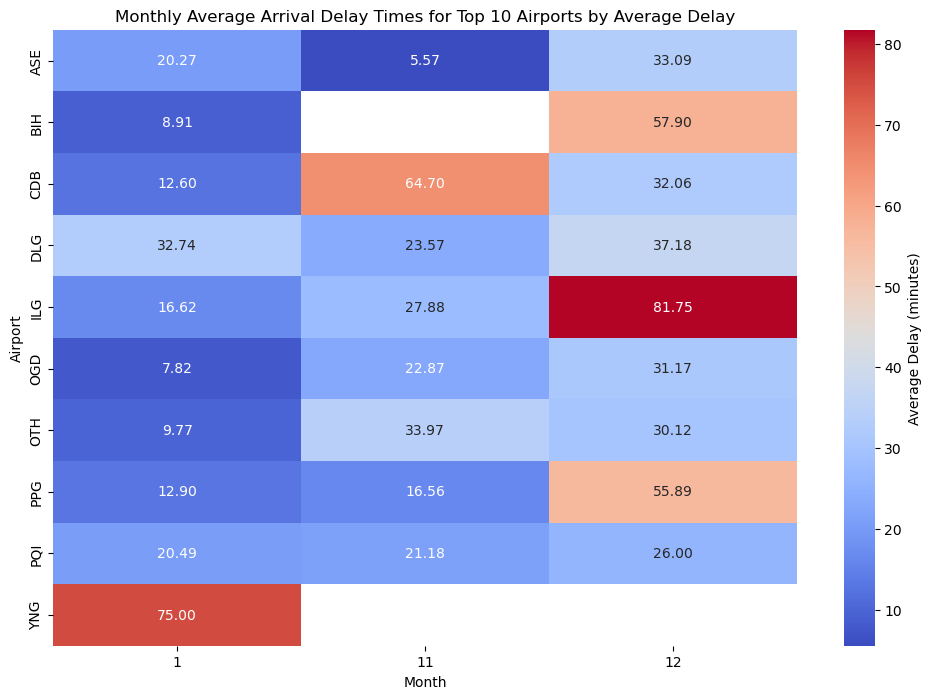

In [8]:
# 1. 计算每个机场每月的平均到达延误时间 (ARR_DELAY)
airport_monthly_delay = df.groupby(['ORIGIN', 'MONTH'])['ARR_DELAY'].mean().reset_index()
airport_monthly_delay.columns = ['Airport', 'Month', 'Delay Mean']

# 2. 计算每个机场的平均延误时间，找到排名前十的机场
top_airports_delay = airport_monthly_delay.groupby('Airport')['Delay Mean'].mean().nlargest(10).index

# 3. 筛选出前十机场的数据
top_airport_data_delay = airport_monthly_delay[airport_monthly_delay['Airport'].isin(top_airports_delay)]

# 4. 将数据转为透视表格式，方便绘制热力图
pivot_table_top_delay = top_airport_data_delay.pivot(index="Airport", columns="Month", values="Delay Mean")

# 5. 可视化 - 使用热力图展示延误时间排名前十的机场在不同月份的平均延误时间
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_top_delay, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Average Delay (minutes)'})
plt.title("Monthly Average Arrival Delay Times for Top 10 Airports by Average Delay")
plt.xlabel("Month")
plt.ylabel("Airport")
plt.show()

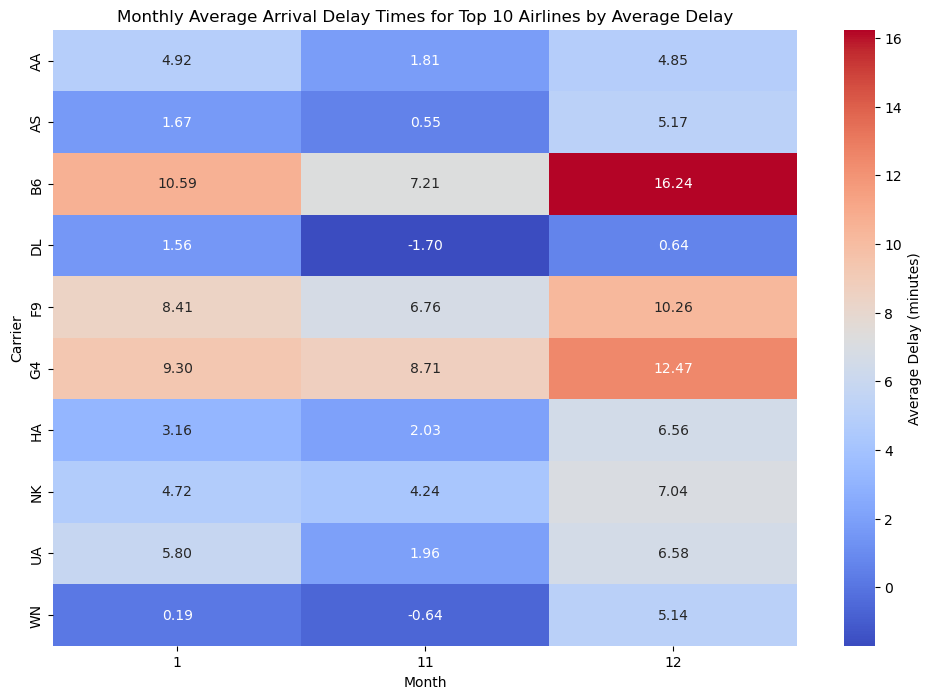

In [9]:
carrier_monthly_delay = df.groupby(['MKT_CARRIER', 'MONTH'])['ARR_DELAY'].mean().reset_index()
carrier_monthly_delay.columns = ['Carrier', 'Month', 'Delay Mean']

# 2. 计算每个航空公司的平均延误时间，并找到延误时间均值最大的前十个航空公司
top_carriers = carrier_monthly_delay.groupby('Carrier')['Delay Mean'].mean().nlargest(10).index

# 3. 筛选出前十航空公司的数据
top_carrier_data = carrier_monthly_delay[carrier_monthly_delay['Carrier'].isin(top_carriers)]

# 4. 将数据转换为透视表格式，方便绘制热力图
pivot_table_carrier_delay_top = top_carrier_data.pivot(index="Carrier", columns="Month", values="Delay Mean")

# 5. 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_carrier_delay_top, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Average Delay (minutes)'})
plt.title("Monthly Average Arrival Delay Times for Top 10 Airlines by Average Delay")
plt.xlabel("Month")
plt.ylabel("Carrier")
plt.show()

In [ ]:
df["DEP_DELAY"].max()

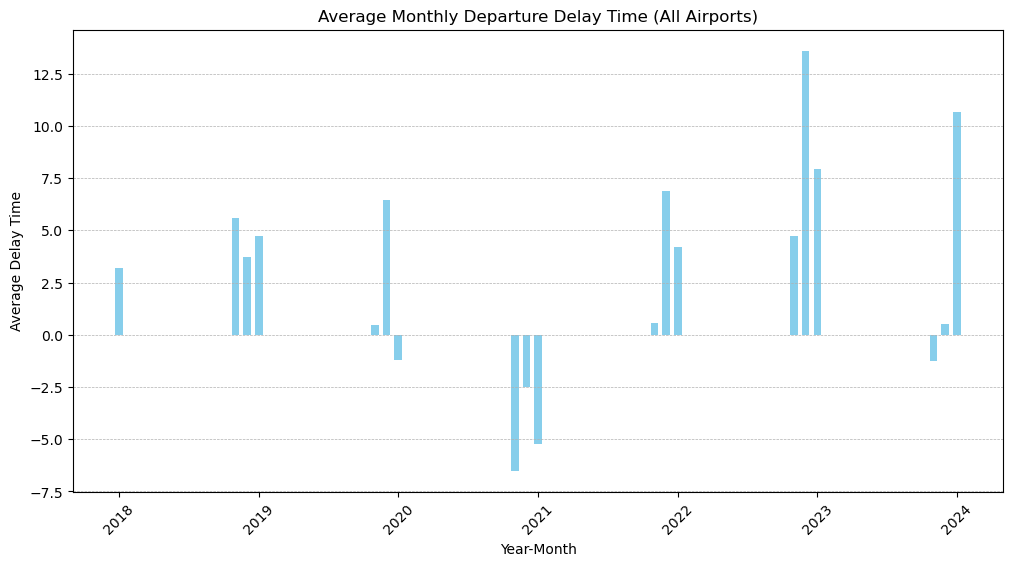

In [19]:
df['YEAR'] = df['YEAR'].astype(int)
df['MONTH'] = df['MONTH'].astype(int)

# 按年月聚合数据，计算每月的平均延迟时间
df['year_month'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))  # 创建年-月列
monthly_delay = df.groupby(['year_month'])['ARR_DELAY'].mean().reset_index()

# 设定图表大小
plt.figure(figsize=(12, 6))

# 绘制所有机场的整体平均延迟时间
plt.bar(monthly_delay['year_month'], monthly_delay['ARR_DELAY'], width=20, color='skyblue')

# 添加标签和标题
plt.xlabel("Year-Month")
plt.ylabel("Average Delay Time")
plt.title("Average Monthly Departure Delay Time (All Airports)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()

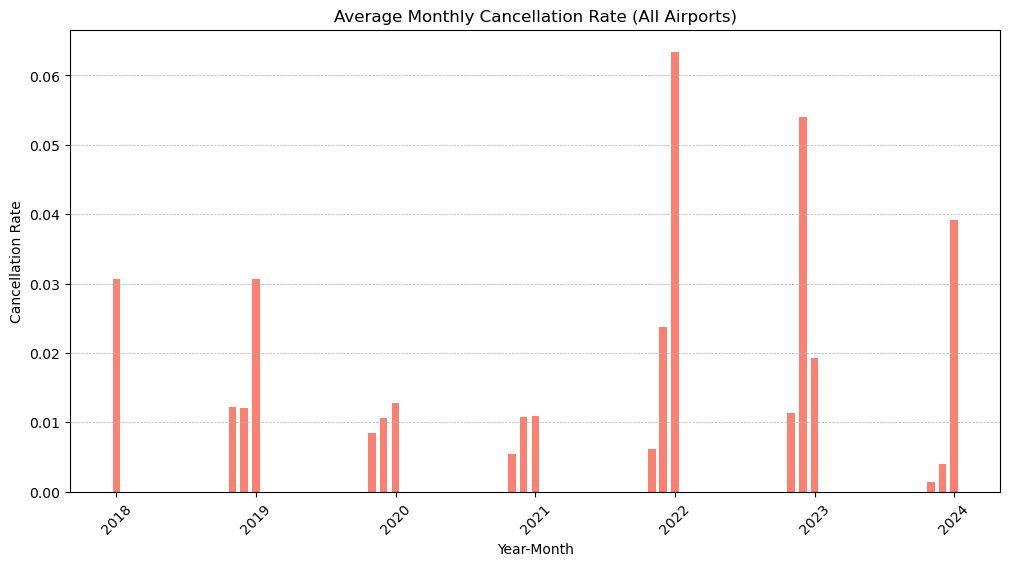

In [20]:
df['YEAR'] = df['YEAR'].astype(int)
df['MONTH'] = df['MONTH'].astype(int)

# 按年月聚合数据，计算每月的取消率
df['year_month'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))  # 创建年-月列
monthly_cancellation = df.groupby(['year_month'])['CANCELLED'].mean().reset_index()

# 设定图表大小
plt.figure(figsize=(12, 6))

# 绘制所有机场的整体取消率
plt.bar(monthly_cancellation['year_month'], monthly_cancellation['CANCELLED'], width=20, color='salmon')

# 添加标签和标题
plt.xlabel("Year-Month")
plt.ylabel("Cancellation Rate")
plt.title("Average Monthly Cancellation Rate (All Airports)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [12]:
pd.set_option("display.max_columns",None)
df.head()

,Unnamed: 0,index,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Timechange_CRS_DEP_Time,Timechange_FL_DATE,Timechange_ARR_Time,DATE_ORIGIN,NAME_ORIGIN,REPORT_TYPE_ORIGIN,HourlyPrecipitation_ORIGIN,HourlyRelativeHumidity_ORIGIN,HourlySkyConditions_ORIGIN,HourlyStationPressure_ORIGIN,HourlyVisibility_ORIGIN,HourlyWetBulbTemperature_ORIGIN,HourlyWindGustSpeed_ORIGIN,HourlyWindSpeed_ORIGIN,DailySnowDepth_ORIGIN,DailySnowfall_ORIGIN,DATE_DEST,NAME_DEST,REPORT_TYPE_DEST,HourlyPrecipitation_DEST,HourlyRelativeHumidity_DEST,HourlySkyConditions_DEST,HourlyStationPressure_DEST,HourlyVisibility_DEST,HourlyWetBulbTemperature_DEST,HourlyWindGustSpeed_DEST,HourlyWindSpeed_DEST,DailySnowDepth_DEST,DailySnowfall_DEST,ARR_Time_min,DEP_Time_min,Y,DELAYED,EXTREME_ORIGIN,EXTREME_DEST,Days_after_Thanksgiving,Days_after_Christmas,Days_after_New_Year,CRS_DEP_HOUR,year_month
0,0,9581,2018,1,1,1,DL,5391,EV,20366,N146PQ,5391.0,ATL,"Atlanta, GA",ABE,"Allentown/Bethlehem/Easton, PA",1505,1703.0,118.0,16.0,10.0,1710,1900.0,110.0,0,0.0,117.0,692.0,0.0,0.0,0.0,0.0,110.0,14:05,2018-01-01,19:00,2018-01-01 13:54:00,"JACKSON INTERNATIONAL AIRPORT, MS US",FM-15,0.0,38.0,FEW:02 76.2,1023.9,16.093,-5.2,11.800000,8.8,0.0,0.0,2018-01-01 13:51:00,"ALLENTOWN LEHIGH VALLEY INTERNATIONAL AIRPORT,...",FM-15,0.0,35.0,CLR:00,1013.6,16.093,-10.4,NaN,5.7,30.0,0.0,1140,845,295,1,1,0,39,7,0,15.0,2018-01-01
1,1,30573,2018,1,2,2,DL,5391,EV,20366,N607LR,5391.0,ATL,"Atlanta, GA",ABE,"Allentown/Bethlehem/Easton, PA",1505,1530.0,25.0,12.0,4.0,1710,1723.0,13.0,0,0.0,113.0,692.0,NaN,NaN,NaN,NaN,NaN,14:05,2018-01-02,17:23,2018-01-02 13:54:00,"JACKSON INTERNATIONAL AIRPORT, MS US",FM-15,0.0,32.0,SCT:04 30.48,1019.9,16.093,-4.2,10.400309,3.6,0.0,0.0,2018-01-02 13:51:00,"ALLENTOWN LEHIGH VALLEY INTERNATIONAL AIRPORT,...",FM-15,0.0,48.0,CLR:00,1013.6,16.093,-6.9,9.8,6.2,30.0,0.0,1043,845,198,0,0,0,40,8,1,15.0,2018-01-01
2,2,31526,2018,1,2,2,DL,960,DL,19790,N978AT,960.0,ATL,"Atlanta, GA",ABE,"Allentown/Bethlehem/Easton, PA",2127,2217.0,50.0,11.0,5.0,2330,7.0,37.0,0,0.0,110.0,692.0,37.0,0.0,0.0,0.0,0.0,20:27,2018-01-02,00:07,2018-01-02 20:54:00,"JACKSON INTERNATIONAL AIRPORT, MS US",FM-15,0.0,44.0,OVC:08 33.53,1017.9,16.093,-5.2,10.400532,3.1,0.0,0.0,2018-01-02 20:51:00,"ALLENTOWN LEHIGH VALLEY INTERNATIONAL AIRPORT,...",FM-15,0.0,61.0,CLR:00,1013.0,16.093,-11.9,9.8,3.1,30.0,0.0,7,1227,220,1,1,0,40,8,1,21.0,2018-01-01
3,3,49391,2018,1,3,3,DL,1794,DL,19790,N971AT,1794.0,ATL,"Atlanta, GA",ABE,"Allentown/Bethlehem/Easton, PA",2130,2127.0,-3.0,19.0,4.0,2337,2325.0,-12.0,0,0.0,118.0,692.0,NaN,NaN,NaN,NaN,NaN,20:30,2018-01-03,23:25,2018-01-03 20:54:00,"JACKSON INTERNATIONAL AIRPORT, MS US",FM-15,0.0,65.0,CLR:00,1012.2,16.093,-6.6,10.400524,0.0,0.0,0.0,2018-01-03 20:51:00,"ALLENTOWN LEHIGH VALLEY INTERNATIONAL AIRPORT,...",FM-15,0.0,55.0,BKN:07 33.53,1004.9,16.093,-8.6,9.8,1.5,0.0,0.0,1405,1230,175,0,0,1,41,9,2,21.0,2018-01-01
4,4,51877,2018,1,3,3,DL,5541,EV,20366,N195PQ,5541.0,ATL,"Atlanta, GA",ABE,"Allentown/Bethlehem/Easton, PA",1015,1022.0,7.0,19.0,21.0,1219,1234.0,15.0,0,0.0,132.0,692.0,7.0,0.0,8.0,0.0,0.0,09:15,2018-01-03,12:34,2018-01-03 08:54:00,"JACKSON INTERNATIONAL AIRPORT, MS US",FM-15,0.0,51.0,FEW:02 30.48,1015.9,16.093,-5.8,10.400524,1.5,0.0,0.0,2018-01-03 08:51:00,"ALLENTOWN LEHIGH VALLEY INTERNATIONAL AIRPORT,...",FM-15,0.0,70.0,CLR:00,1012.6,14.484,-13.7,9.8,0.0,0.0,0.0,754,555,199,0,0,0,41,9,2,10.0,2018-01-01


In [13]:
df["Days_after_Thanksgiving"].min()

-28

In [14]:
df["Days_after_Thanksgiving"].max()

71

In [1]:
bins = [-15, -3, 5, 15]  # 定义分组区间
labels = ['-15 to -3', '-3 to 5', '5 to 15']  # 分组的标签

# 将 'Days_after_Thanksgiving' 列分配到对应的组
df['Group'] = pd.cut(df['Days_after_Thanksgiving'], bins=bins, labels=labels, right=True)

# 2. 计算每个组的平均延迟时间
grouped_delay = df.groupby('Group')['DEP_DELAY'].mean().reset_index()

# 3. 绘制柱状图
plt.figure(figsize=(8, 6))
plt.bar(grouped_delay['Group'], grouped_delay['DEP_DELAY'], color='skyblue')

# 添加标签和标题
plt.xlabel('Group')
plt.ylabel('Average Delay Time (minutes)')
plt.title('Average Departure Delay Time for Each Group of Days After Thanksgiving')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()

NameError: name 'pd' is not defined

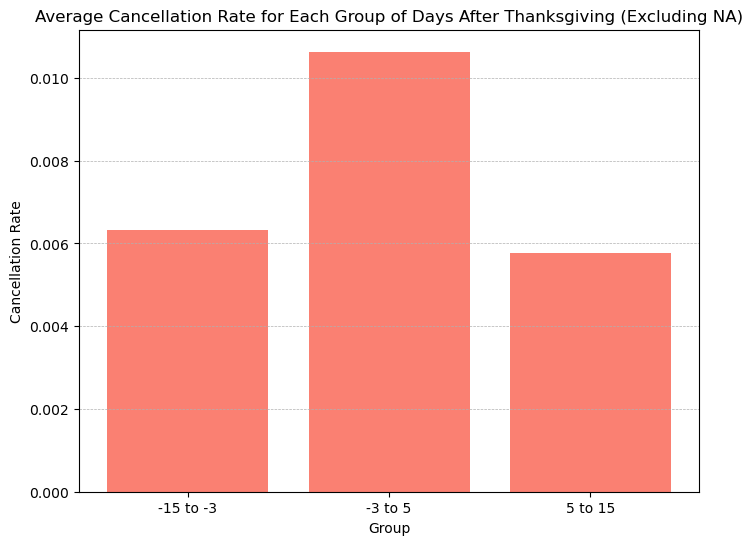

In [16]:
bins = [-15, -3, 5, 15]  # 定义分组区间
labels = ['-15 to -3', '-3 to 5', '5 to 15']  # 分组的标签

# 将 'Days_after_Thanksgiving' 列分配到对应的组
df['Group'] = pd.cut(df['Days_after_Thanksgiving'], bins=bins, labels=labels, right=True)

# 2. 去除 NaN 数据，计算每个组的平均取消率
grouped_cancel_rate = df.dropna(subset=['CANCELLED']).groupby('Group')['CANCELLED'].mean().reset_index()

# 3. 绘制柱状图
plt.figure(figsize=(8, 6))
plt.bar(grouped_cancel_rate['Group'], grouped_cancel_rate['CANCELLED'], color='salmon')

# 添加标签和标题
plt.xlabel('Group')
plt.ylabel('Cancellation Rate')
plt.title('Average Cancellation Rate for Each Group of Days After Thanksgiving (Excluding NA)')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()

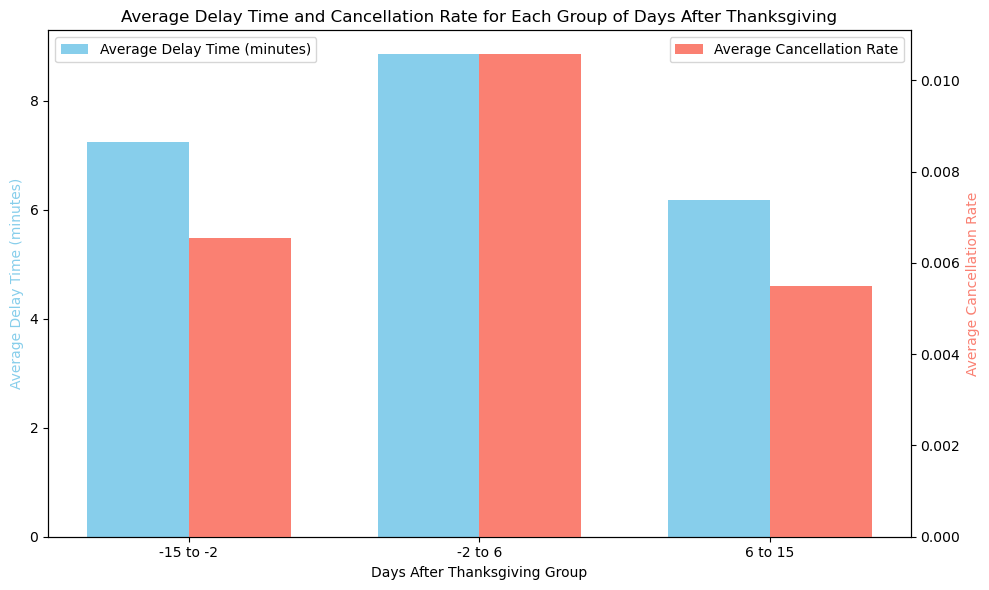

In [3]:
bins = [-15, -2, 6, 15]  # 定义分组区间
labels = ['-15 to -2', '-2 to 6', '6 to 15']  # 分组的标签

# 将 'Days_after_Thanksgiving' 列分配到对应的组
df['Group'] = pd.cut(df['Days_after_Thanksgiving'], bins=bins, labels=labels, right=True)

# 2. 去除 NaN 数据，计算每个组的平均延迟时间和平均取消率
grouped_delay = df.dropna(subset=['DEP_DELAY']).groupby('Group')['DEP_DELAY'].mean().reset_index()
grouped_cancel_rate = df.dropna(subset=['CANCELLED']).groupby('Group')['CANCELLED'].mean().reset_index()

# 3. 设置图形大小
fig, ax1 = plt.subplots(figsize=(10, 6))

# 4. 设置柱状图的宽度和位置
width = 0.35  # 每个柱状图的宽度
x = range(len(grouped_delay))  # x 轴的位置索引

# 5. 绘制左侧的延迟时间柱状图
ax1.bar(x, grouped_delay['DEP_DELAY'], width, label='Average Delay Time (minutes)', color='skyblue')

# 6. 创建右侧的纵轴（共享 x 轴）
ax2 = ax1.twinx()

# 7. 绘制右侧的取消率柱状图
ax2.bar([p + width for p in x], grouped_cancel_rate['CANCELLED'], width, label='Average Cancellation Rate', color='salmon')

# 8. 设置 x 轴标签为组名
ax1.set_xticks([p + width / 2 for p in x])  # 设置x轴的位置，使柱状图在x轴上居中
ax1.set_xticklabels(grouped_delay['Group'])

# 9. 添加标签、标题和图例
ax1.set_xlabel('Days After Thanksgiving Group')
ax1.set_ylabel('Average Delay Time (minutes)', color='skyblue')
ax2.set_ylabel('Average Cancellation Rate', color='salmon')
ax1.set_title('Average Delay Time and Cancellation Rate for Each Group of Days After Thanksgiving')

# 10. 设置图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 11. 显示图形
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局，避免标签重叠
plt.show()


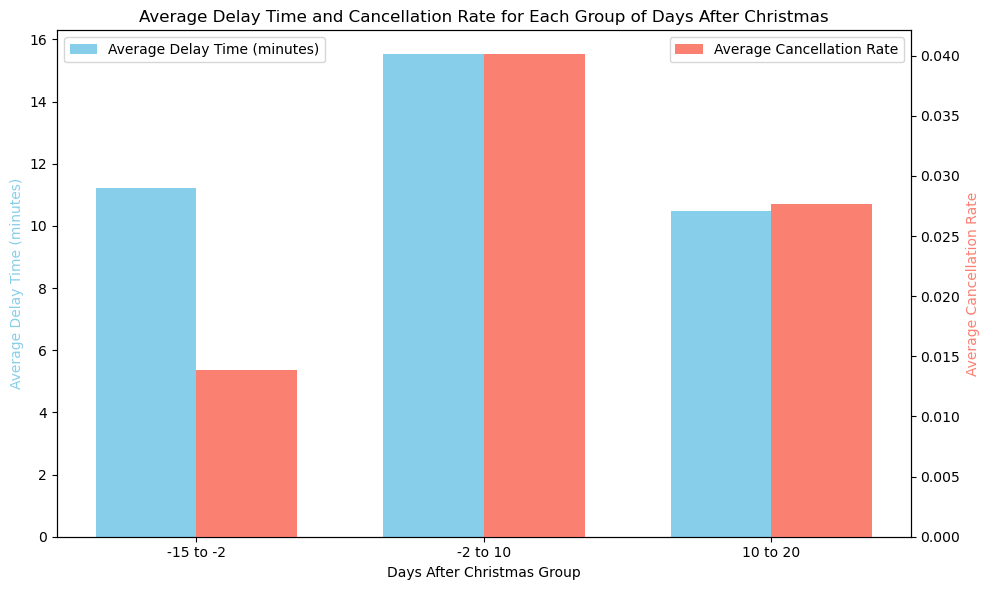

In [8]:
bins = [-15, -2, 10, 20]  # 定义分组区间
labels = ['-15 to -2', '-2 to 10', '10 to 20']  # 分组的标签

# 将 'Days_after_Christmas' 列分配到对应的组
df['Christmas_Group'] = pd.cut(df['Days_after_Christmas'], bins=bins, labels=labels, right=True)

# 2. 去除 NaN 数据，计算每个组的平均延迟时间和平均取消率
grouped_delay_christmas = df.dropna(subset=['DEP_DELAY']).groupby('Christmas_Group')['DEP_DELAY'].mean().reset_index()
grouped_cancel_rate_christmas = df.dropna(subset=['CANCELLED']).groupby('Christmas_Group')['CANCELLED'].mean().reset_index()

# 3. 设置图形大小
fig, ax1 = plt.subplots(figsize=(10, 6))

# 4. 设置柱状图的宽度和位置
width = 0.35  # 每个柱状图的宽度
x = range(len(grouped_delay_christmas))  # x 轴的位置索引

# 5. 绘制左侧的延迟时间柱状图
ax1.bar(x, grouped_delay_christmas['DEP_DELAY'], width, label='Average Delay Time (minutes)', color='skyblue')

# 6. 创建右侧的纵轴（共享 x 轴）
ax2 = ax1.twinx()

# 7. 绘制右侧的取消率柱状图
ax2.bar([p + width for p in x], grouped_cancel_rate_christmas['CANCELLED'], width, label='Average Cancellation Rate', color='salmon')

# 8. 设置 x 轴标签为组名
ax1.set_xticks([p + width / 2 for p in x])  # 设置x轴的位置，使柱状图在x轴上居中
ax1.set_xticklabels(grouped_delay_christmas['Christmas_Group'])

# 9. 添加标签、标题和图例
ax1.set_xlabel('Days After Christmas Group')
ax1.set_ylabel('Average Delay Time (minutes)', color='skyblue')
ax2.set_ylabel('Average Cancellation Rate', color='salmon')
ax1.set_title('Average Delay Time and Cancellation Rate for Each Group of Days After Christmas')

# 10. 设置图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 11. 显示图形
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局，避免标签重叠
plt.show()

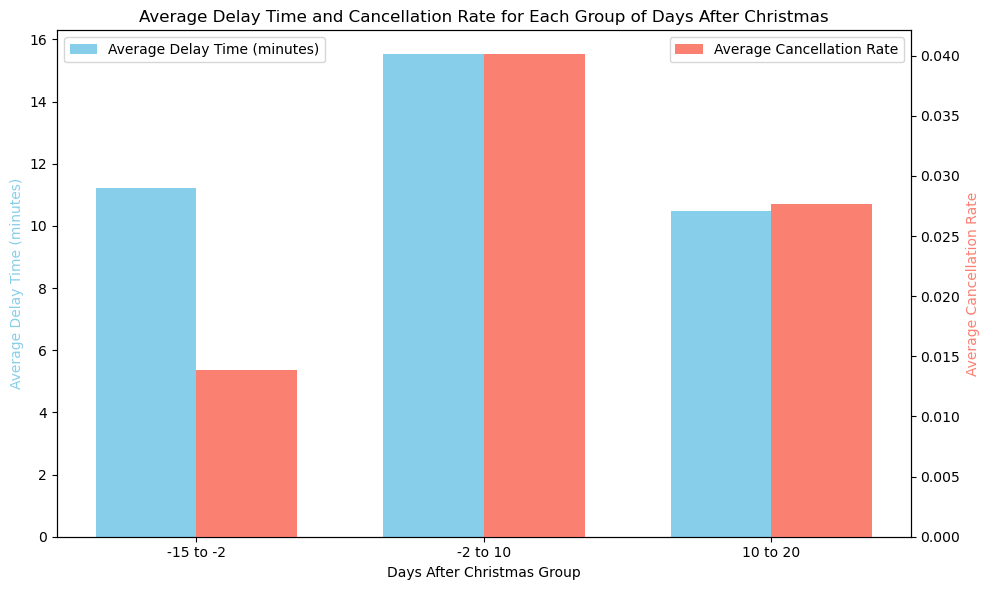

In [5]:
# 将 'Days_after_Christmas' 列分配到对应的组
df['Christmas_Group'] = pd.cut(df['Days_after_Christmas'], bins=bins, labels=labels, right=True)

# 去除 NaN 数据，计算每个组的平均延迟时间和平均取消率
grouped_delay_christmas = df.dropna(subset=['DEP_DELAY']).groupby('Christmas_Group')['DEP_DELAY'].mean().reset_index()
grouped_cancel_rate_christmas = df.dropna(subset=['CANCELLED']).groupby('Christmas_Group')['CANCELLED'].mean().reset_index()

# 设置图形大小
fig, ax1 = plt.subplots(figsize=(10, 6))

# 设置柱状图的宽度和位置
width = 0.35  # 每个柱状图的宽度
x = range(len(grouped_delay_christmas))  # x 轴的位置索引

# 绘制左侧的延迟时间柱状图
ax1.bar(x, grouped_delay_christmas['DEP_DELAY'], width, label='Average Delay Time (minutes)', color='skyblue')

# 创建右侧的纵轴（共享 x 轴）
ax2 = ax1.twinx()

# 绘制右侧的取消率柱状图
ax2.bar([p + width for p in x], grouped_cancel_rate_christmas['CANCELLED'], width, label='Average Cancellation Rate', color='salmon')

# 设置 x 轴标签为组名
ax1.set_xticks([p + width / 2 for p in x])  # 设置x轴的位置，使柱状图在x轴上居中
ax1.set_xticklabels(grouped_delay_christmas['Christmas_Group'])

# 添加标签、标题和图例
ax1.set_xlabel('Days After Christmas Group')
ax1.set_ylabel('Average Delay Time (minutes)', color='skyblue')
ax2.set_ylabel('Average Cancellation Rate', color='salmon')
ax1.set_title('Average Delay Time and Cancellation Rate for Each Group of Days After Christmas')

# 设置图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 显示图形
plt.xticks(rotation=45)
plt.tight_layout()  # 调整布局，避免标签重叠
plt.show()


In [21]:
row_count = len(df)
print(f"DataFrame 行数: {row_count}")

DataFrame 行数: 10797321


In [22]:
columns_list = df.columns.tolist()
print("DataFrame 列名列表:", columns_list)

DataFrame 列名列表: ['Unnamed: 0', 'index', 'YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER', 'MKT_CARRIER_FL_NUM', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'DIVERTED', 'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Timechange_CRS_DEP_Time', 'Timechange_FL_DATE', 'Timechange_ARR_Time', 'DATE_ORIGIN', 'NAME_ORIGIN', 'REPORT_TYPE_ORIGIN', 'HourlyPrecipitation_ORIGIN', 'HourlyRelativeHumidity_ORIGIN', 'HourlySkyConditions_ORIGIN', 'HourlyStationPressure_ORIGIN', 'HourlyVisibility_ORIGIN', 'HourlyWetBulbTemperature_ORIGIN', 'HourlyWindGustSpeed_ORIGIN', 'HourlyWindSpeed_ORIGIN', 'DailySnowDepth_ORIGIN', 'DailySnowfall_ORIGIN', 'DATE_DEST', 'NAME_DEST', 'REPORT_TYPE_DEST', 'HourlyPrecipitation_DEST

In [25]:
df_V8 = pd.read_csv(r"D:\flight_weather_data_V8.csv\flight_weather_data_V8.csv")

C:\Users\lou3208\AppData\Local\Temp\ipykernel_12636\1258536518.py:1: DtypeWarning: Columns (38,41,43,45,47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df_V8 = pd.read_csv(r"D:\flight_weather_data_V8.csv\flight_weather_data_V8.csv")


In [26]:
row_count = len(df_V8)
print(f"DataFrame 行数: {row_count}")

DataFrame 行数: 10909373
